In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,roc_curve,confusion_matrix,precision_recall_curve,average_precision_score,auc

In [2]:
data = pd.read_csv("bank.csv", sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:

X = data.drop(columns=["y"])
y = data['y']
X_encoded = pd.get_dummies(X)
y_encoded = data["y"].map({"no": 0, "yes": 1})
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=35)


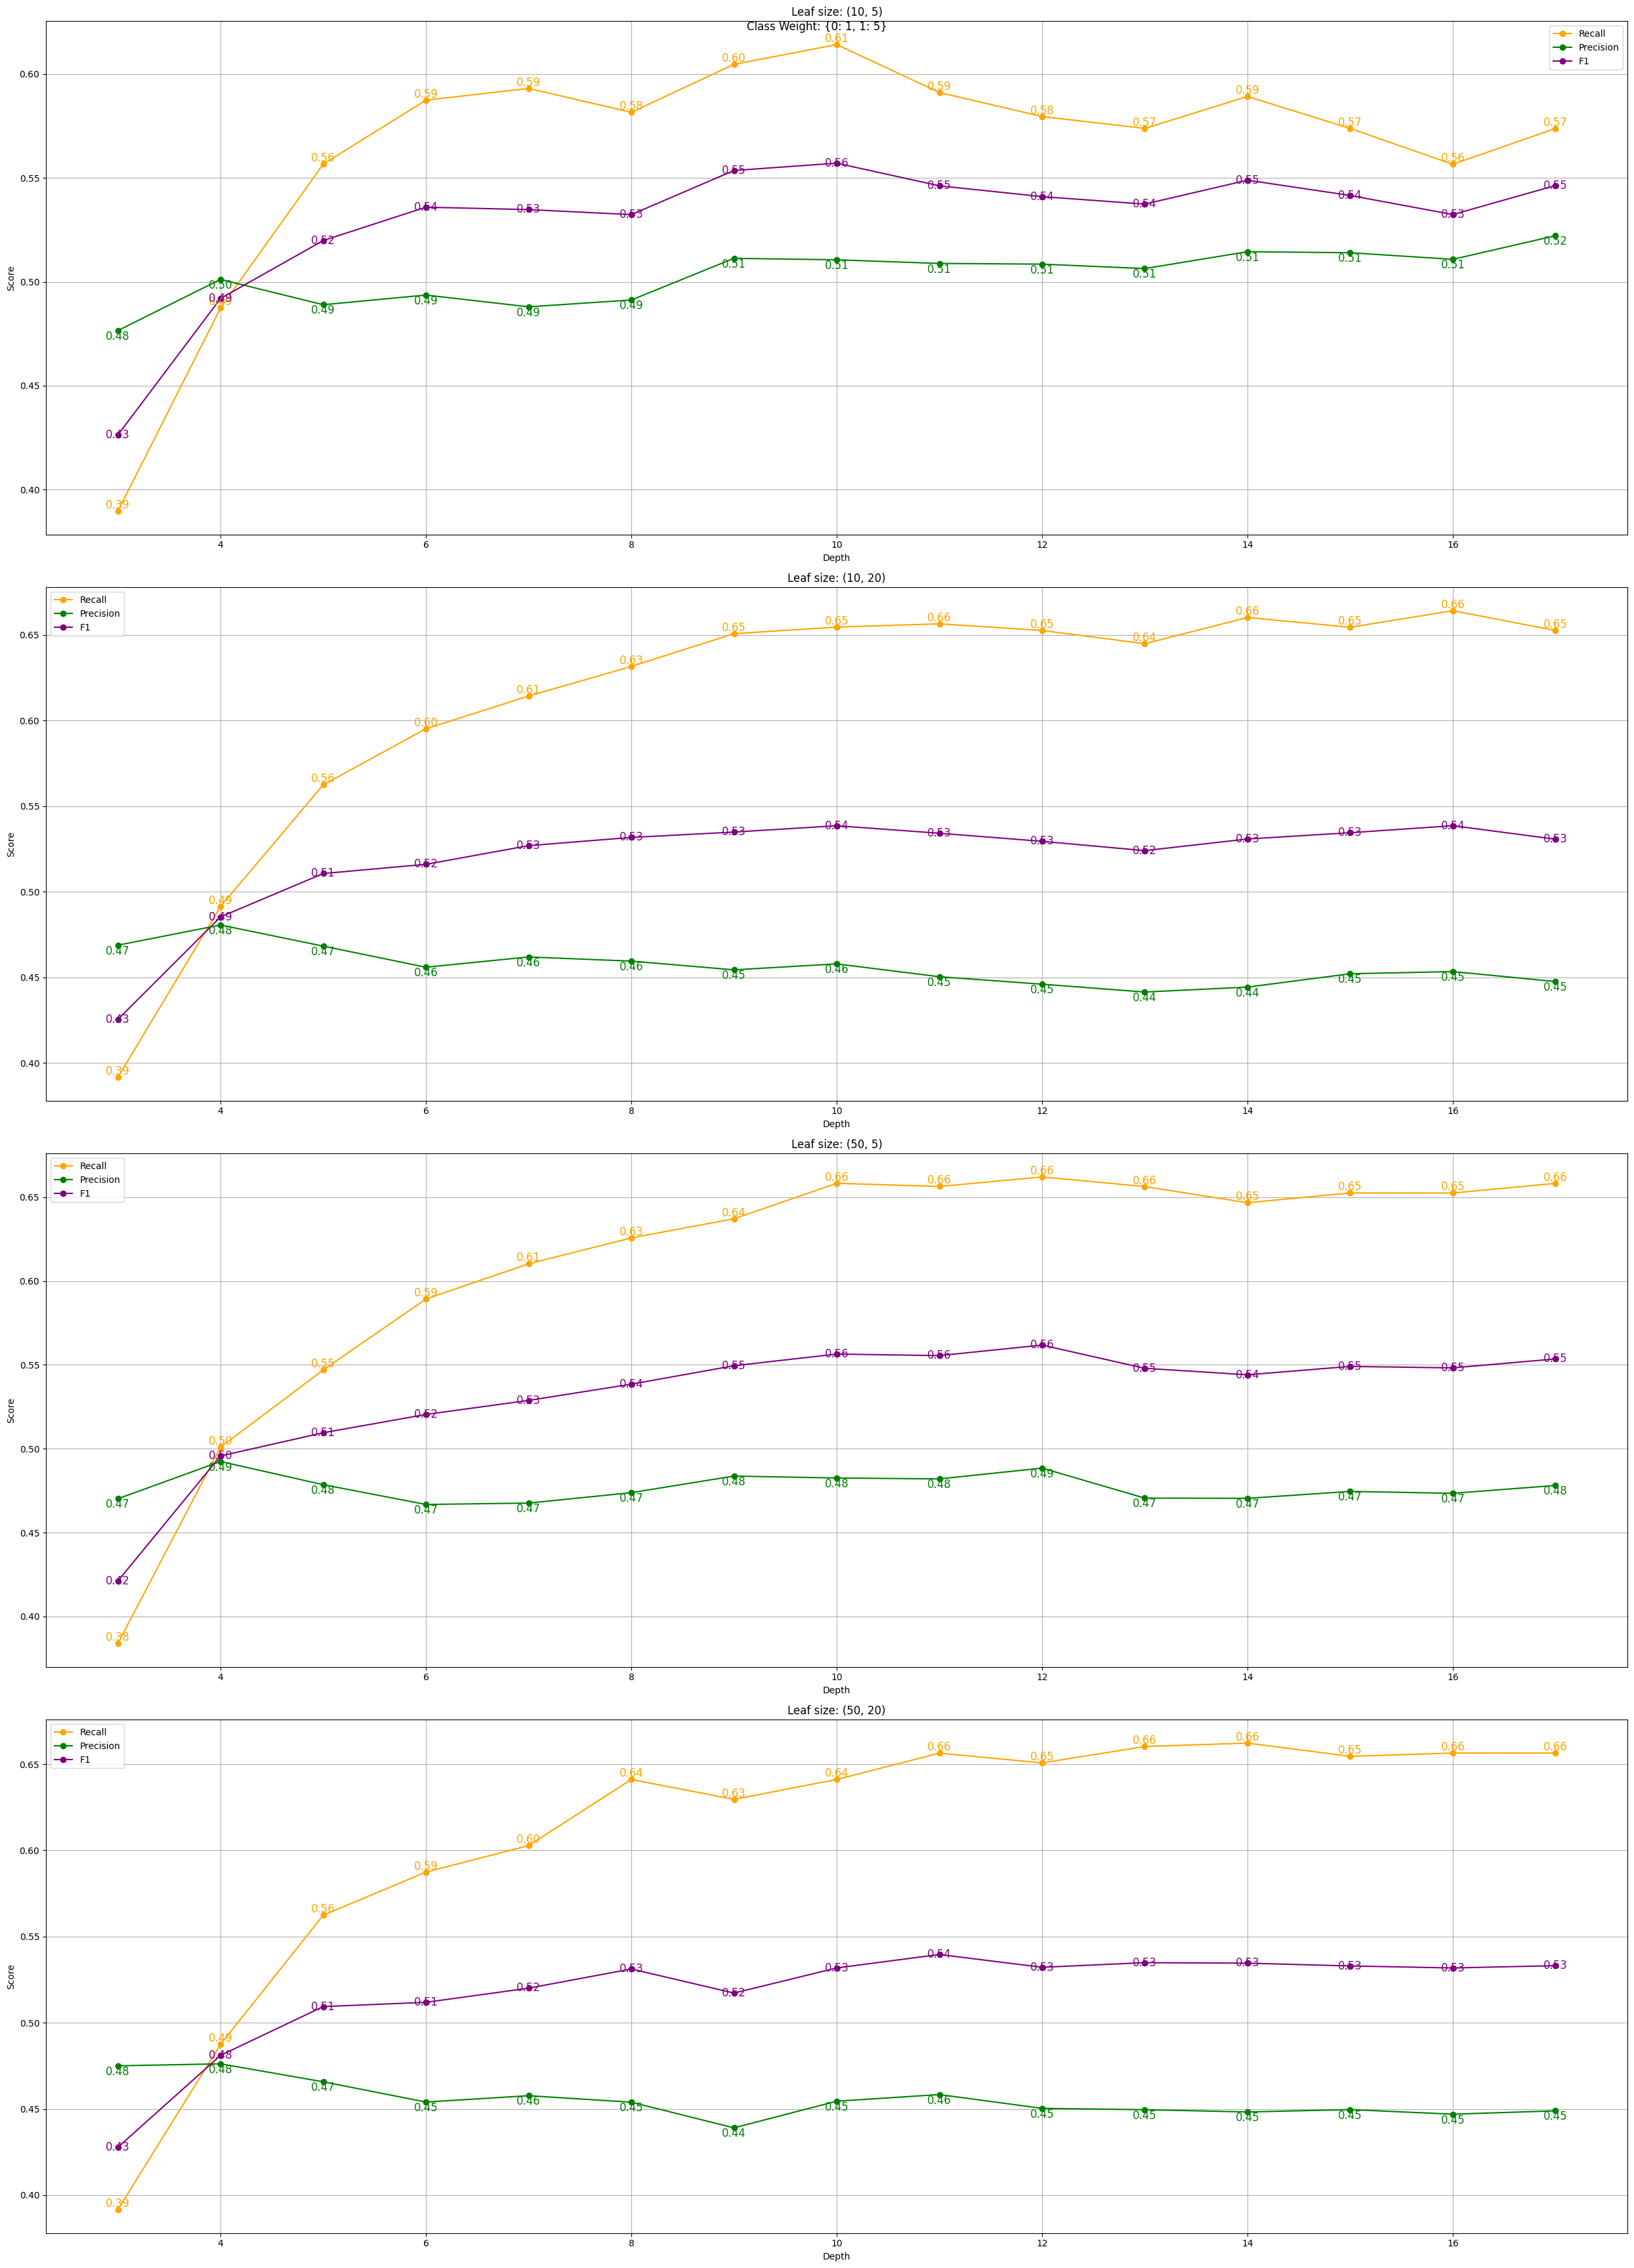

In [ ]:
depths = range(3, 18)
min_samples_splits = [10, 50]
min_samples_leaf = [5, 20]
criteria = ["gini"] #, "entropy"
resoult = []
n_estimators = 100
class_weights_list = [{0: 1, 1: 5}]

for class_weights in class_weights_list:
    for depth in depths:
        for f in min_samples_splits:
            for w in min_samples_leaf:

                    for ccc in criteria:
                        model = RandomForestClassifier(            n_estimators=n_estimators,
                            max_depth=depth,min_samples_split=f,min_samples_leaf=w, criterion=ccc, random_state=42,class_weight=class_weights,n_jobs=-1
                        )
                        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

                        scoring_metrics = {
                            "accuracy": "accuracy",
                            "recall": "recall",
                            "precision": "precision",
                            "f1": "f1"
                        }

                        scores = cross_validate(
                            model, X_encoded, y_encoded, cv=cv, scoring=scoring_metrics, return_estimator=True
                        )

                        resoult.append({
                            "class_weight": str(class_weights),
                            "depth": depth,
                            "min_samples_split": f,
                            "min_samples_leaf":w,
                            "criterion": ccc,
                            "accuracy": scores["test_accuracy"].mean(),
                            "recall": scores["test_recall"].mean(),
                            "precision": scores["test_precision"].mean(),
                            "f1": scores["test_f1"].mean()
                        })
results_df = pd.DataFrame(resoult)


for criterion in criteria:
    for class_weight in class_weights_list:
        weight_str = str(class_weight)
        plt.figure(figsize=(25, 35))
        weight_subset = results_df[
            (results_df["criterion"] == criterion) & 
            (results_df["class_weight"] == weight_str)
        ]
        unique_groups = weight_subset.groupby(["min_samples_split","min_samples_leaf"]).groups
        
        for i, (group, indices) in enumerate(unique_groups.items()):
            subset = weight_subset.loc[indices]
            plt.subplot(4, 1, i + 1)
            plt.plot(subset["depth"], subset["recall"], label="Recall", marker='o', color='orange')
            plt.plot(subset["depth"], subset["precision"], label="Precision", marker='o', color='green')
            plt.plot(subset["depth"], subset["f1"], label="F1", marker='o', color='purple')

            for x, y_rec, y_prec,y_f1 in zip(subset["depth"], subset["recall"], subset["precision"],subset["f1"]):
                plt.text(x, y_rec, f"{y_rec:.2f}", ha='center', va='bottom', fontsize=12, color='orange')
                plt.text(x, y_prec, f"{y_prec:.2f}", ha='center', va='top', fontsize=12, color='green')
                plt.text(x, y_f1, f"{y_f1:.2f}", ha='center', va='center', fontsize=12, color='purple')
            plt.title(f"Leaf size: {group}")
            plt.xlabel("Depth")
            plt.ylabel("Score")
            plt.legend()
            plt.grid(True)
        
        plt.suptitle(f"Class Weight: {weight_str}", y=0.98)
        plt.tight_layout()
        plt.show()

![График метрик](images/graf1.png)

In [ ]:
#Видим что leaf 20 хуже чем 5,а split 50 лучше чем 10

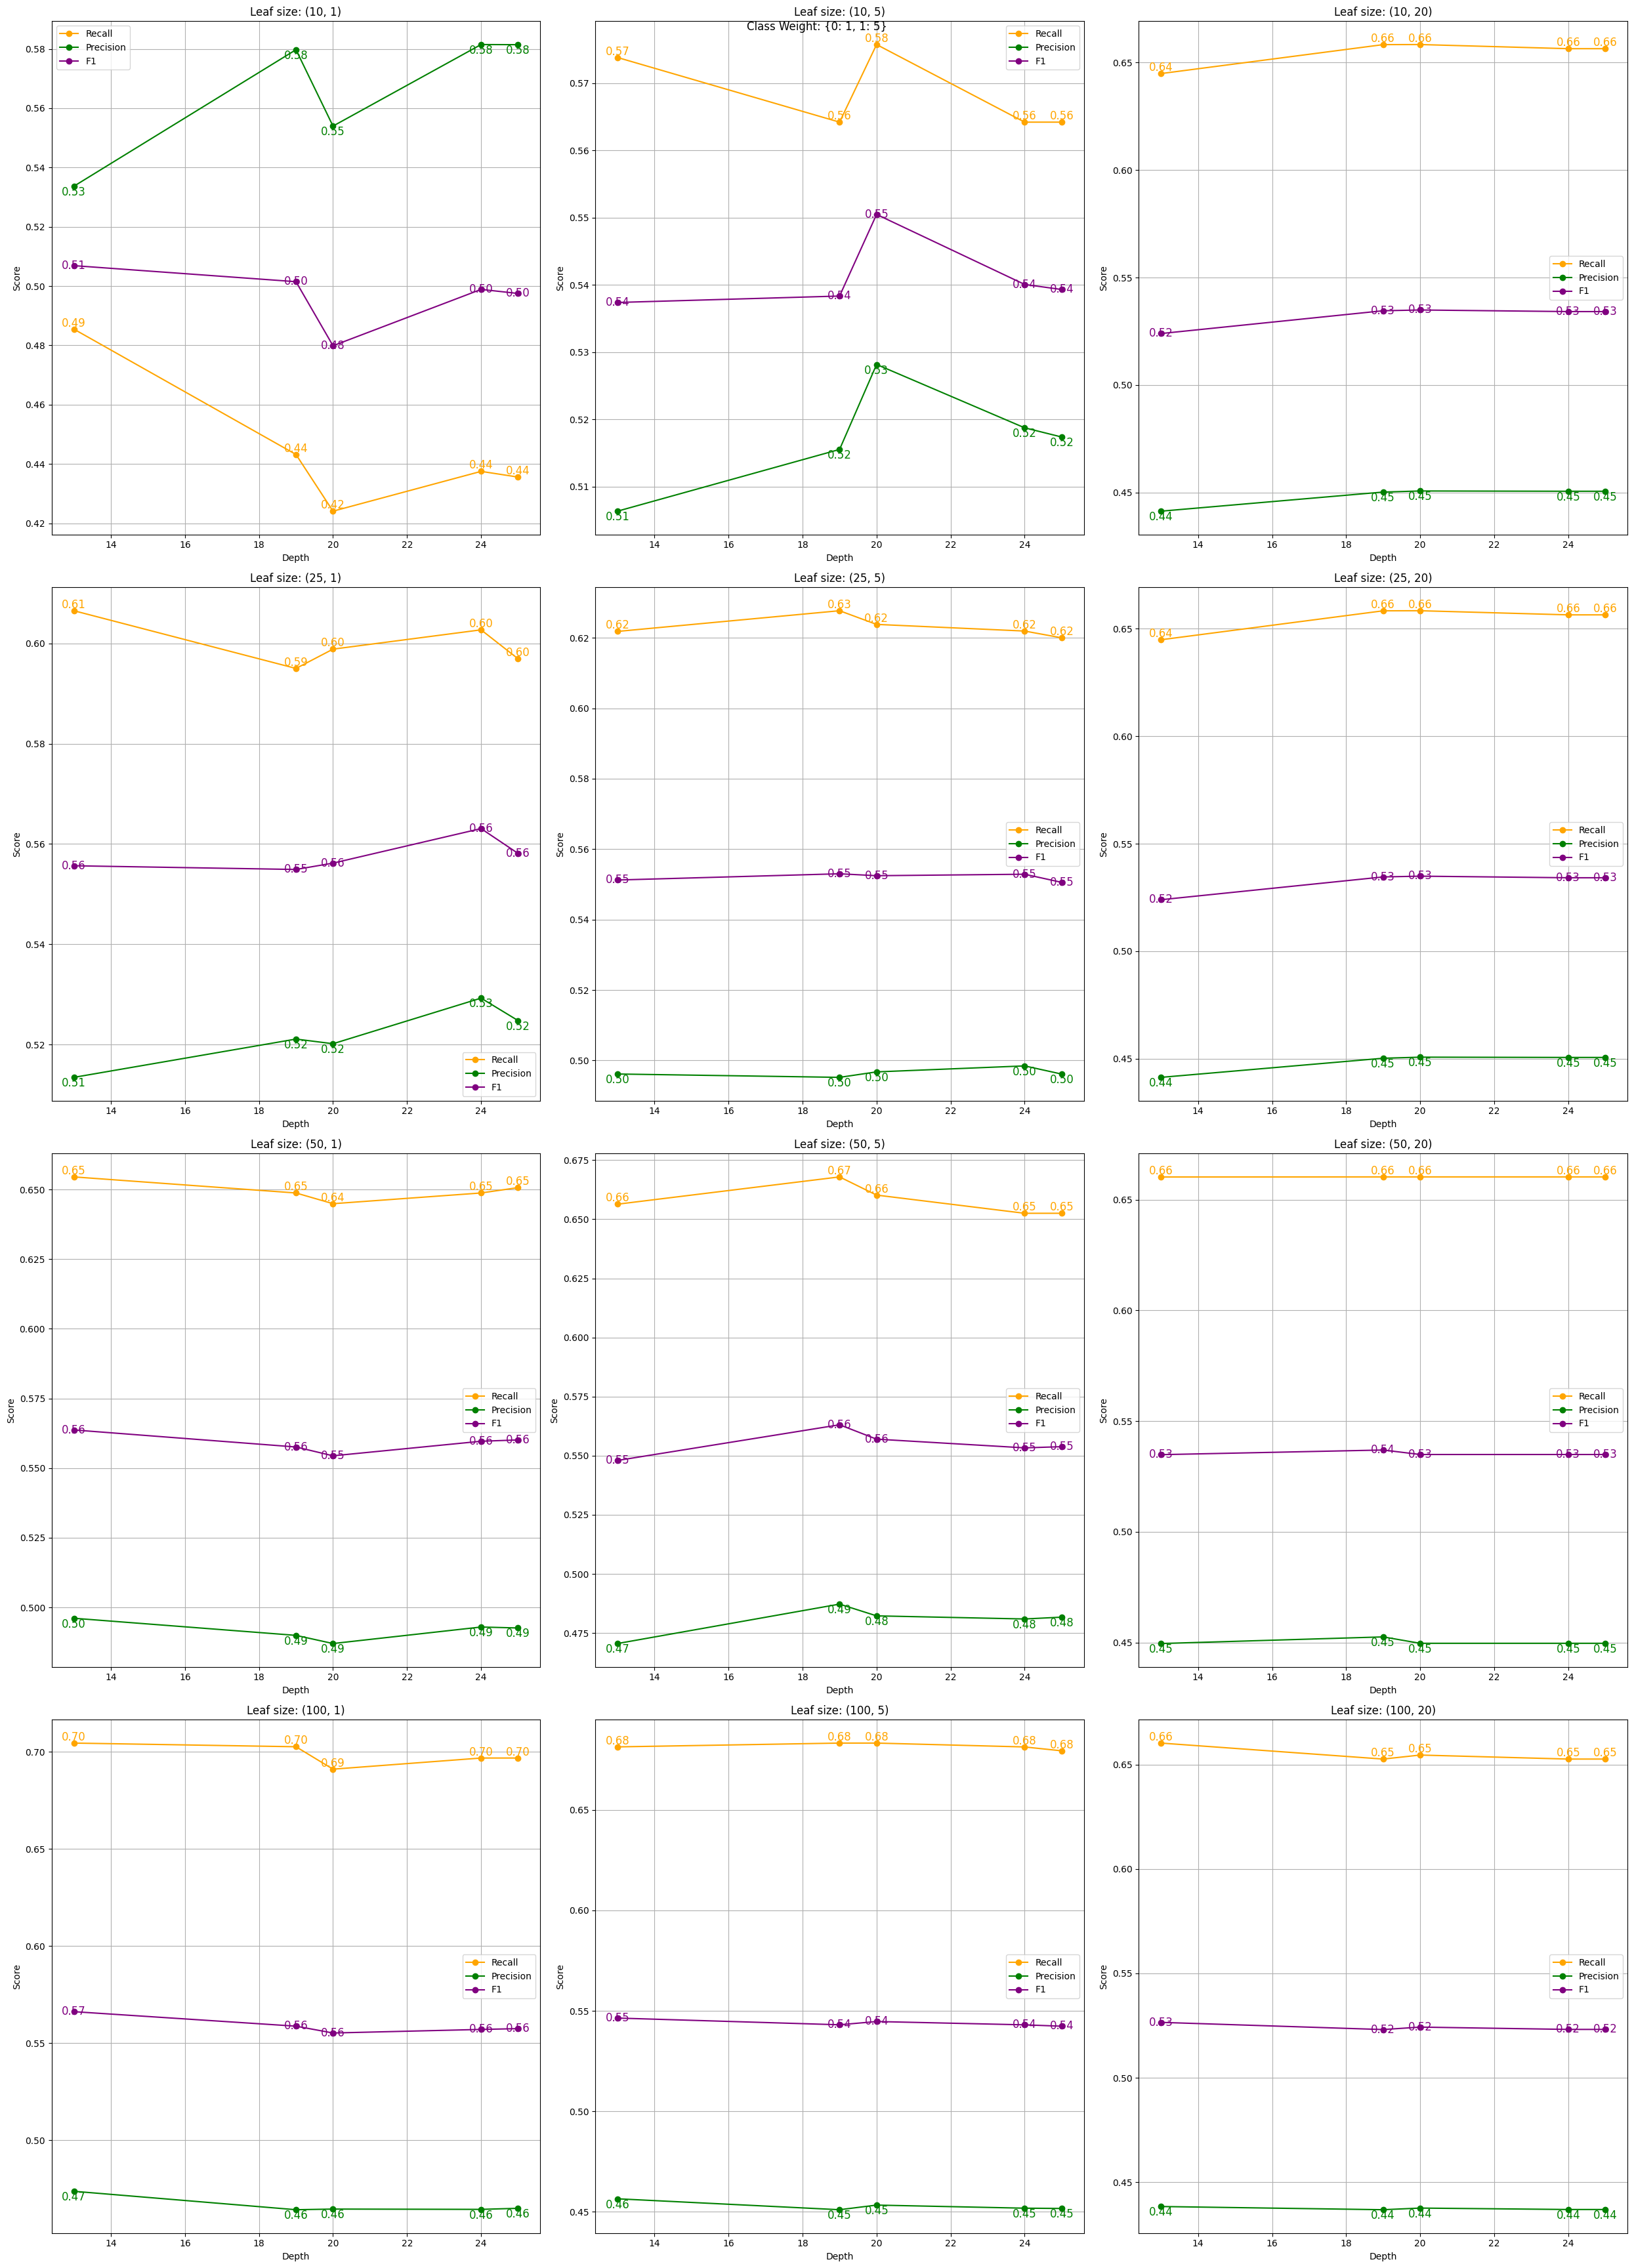

In [ ]:
depths= [13,19,20,24,25]
min_samples_splits = [10,25, 50,100]
min_samples_leaf = [1,5, 20]
criteria = ["gini"] #, "entropy"
resoult = []
n_estimators = 100
class_weights_list = [{0: 1, 1: 5}]

for class_weights in class_weights_list: 
    for depth in depths:
        for f in min_samples_splits:
            for w in min_samples_leaf:

                    for ccc in criteria:
                        model2 = RandomForestClassifier(            n_estimators=n_estimators,
                            max_depth=depth,min_samples_split=f,min_samples_leaf=w, criterion=ccc, random_state=42,class_weight=class_weights,n_jobs=-1
                        )
                        cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

                        scoring_metrics = {
                            "accuracy": "accuracy",
                            "recall": "recall",
                            "precision": "precision",
                            "f1": "f1"
                        }

                        scores = cross_validate(
                            model2, X_encoded, y_encoded, cv=cv, scoring=scoring_metrics, return_estimator=True
                        )

                        resoult.append({
                            "class_weight": str(class_weights),
                            "depth": depth,
                            "min_samples_split": f,
                            "min_samples_leaf":w,
                            "criterion": ccc,
                            "accuracy": scores["test_accuracy"].mean(),
                            "recall": scores["test_recall"].mean(),
                            "precision": scores["test_precision"].mean(),
                            "f1": scores["test_f1"].mean()
                        })

results_df = pd.DataFrame(resoult)

for criterion in criteria:
    for class_weight in class_weights_list:
        weight_str = str(class_weight)
        plt.figure(figsize=(25, 35))
        
        weight_subset = results_df[
            (results_df["criterion"] == criterion) & 
            (results_df["class_weight"] == weight_str)
        ]
        unique_groups = weight_subset.groupby(["min_samples_split","min_samples_leaf"]).groups
        
        for i, (group, indices) in enumerate(unique_groups.items()):
            subset = weight_subset.loc[indices]
            plt.subplot(4, 3, i + 1)
            plt.plot(subset["depth"], subset["recall"], label="Recall", marker='o', color='orange')
            plt.plot(subset["depth"], subset["precision"], label="Precision", marker='o', color='green')
            plt.plot(subset["depth"], subset["f1"], label="F1", marker='o', color='purple')

            for x, y_rec, y_prec,y_f1 in zip(subset["depth"], subset["recall"], subset["precision"],subset["f1"]):
                plt.text(x, y_rec, f"{y_rec:.2f}", ha='center', va='bottom', fontsize=12, color='orange')
                plt.text(x, y_prec, f"{y_prec:.2f}", ha='center', va='top', fontsize=12, color='green')
                plt.text(x, y_f1, f"{y_f1:.2f}", ha='center', va='center', fontsize=12, color='purple')
            plt.title(f"Leaf size: {group}")
            plt.xlabel("Depth")
            plt.ylabel("Score")
            plt.legend()
            plt.grid(True)
        
        plt.suptitle(f"Class Weight: {weight_str}", y=0.98)
        plt.tight_layout()
        plt.show()

![График метрик](images/graf2.png)

In [ ]:
#split 50 5 leaf
# делаем вывод что 50 , 1 даёт более выгодную метрику=> далее строим рандомайзер примерно вокруг этого

In [ ]:
#Для приблизительного выяснения правильных метрик можно ещё применить рандомный метод - он быстро ищет
FF=RandomForestClassifier()
param_dist = {
    "min_samples_split": randint(1, 100),  
    "min_samples_leaf": randint(1, 10),    # 
    "max_depth": randint(15, 27),           # совсем малые значения на графиках не эффективны
    "class_weight": [{0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 2}],  # Избранные пропорции для class_weight
    "n_estimators": randint(100, 300)  
}

random_search = RandomizedSearchCV(FF, param_distributions=param_dist, n_iter=60, scoring="f1", cv=10, n_jobs=-1,random_state=35)
random_search.fit(X_encoded, y_encoded)

print("Лучшие параметры:", random_search.best_params_)
print("Лучшая f1:", random_search.best_score_)

c:\Users\Плазматрон\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Плазматрон\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Плазматрон\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Плазматрон\AppData\Local\Programs\Python\Python312\Lib\site-pac

Лучшие параметры: {'class_weight': {0: 1, 1: 5}, 'max_depth': 23, 'min_samples_leaf': 2, 'min_samples_split': 95, 'n_estimators': 211}
Лучший f1-score: 0.5630040431675681


In [ ]:
#На RandomizedSearchCV у меня получилось
#Лучшие параметры: {'class_weight': {0: 1, 1: 5}, 'max_depth': 23, 'min_samples_leaf': 2, 'min_samples_split': 95, 'n_estimators': 211}
#Лучший f1-score: 0.5630040431675681

In [ ]:
#Перебираем около параметры.( УТОЧНЯЮЩИЙ ПЕРЕБОР )
param_grid = {
    "min_samples_split" : [50,70,90,110,150,],
    "min_samples_leaf": [1,2,3,4],  
    "max_depth": [21, 22, 23, 24, None],
    "class_weight": [{0: 1, 1: 5}, {0: 1, 1: 6}, {0: 1, 1: 4}],
    "n_estimators":[150,211,250]
}

grid_search = GridSearchCV(FF, param_grid, scoring="f1", cv=10, n_jobs=-1)
grid_search.fit(X_encoded, y_encoded)

print("Лучшее min_samples_leaf:", grid_search.best_params_["min_samples_leaf"])
print("Лучшее min_samples_split:", grid_search.best_params_["min_samples_split"])
print("Лучшая глубина дерева:", grid_search.best_params_["max_depth"])
print("Лучший f1-score:", grid_search.best_score_)
print("Лучшая class_weight:", grid_search.best_params_["class_weight"])
print("Лучшая n_estimators:", grid_search.best_params_["n_estimators"])

Лучшее значение min_samples_leaf: 3
Лучшее значение min_samples_split: 70
Лучшая глубина дерева (max_depth): 23
Лучший f1-score: 0.573004157785139
Лучшая class_weight: {0: 1, 1: 5}
Лучшая n_estimators: 211


In [ ]:
#Полученные параметры лучшей модели
#Лучшее значение min_samples_leaf: 3
#Лучшее значение min_samples_split: 70
#Лучшая глубина дерева (max_depth): 23
##Лучший f1-score: 0.573004157785139
#Лучшая class_weight: {0: 1, 1: 5}
#Лучшая n_estimators: 211


In [ ]:
#Проверяем модель на обучающих и тестовых данных,а не на кросс валидации
DD = RandomForestClassifier(n_estimators=211,max_depth=23,min_samples_split=70,min_samples_leaf=3, criterion='gini', random_state=35,class_weight={0: 1, 1: 5},n_jobs=-1)
DD.fit(X_train1, y_train1) 
# обучаем модель на train и предсказываем test. До этого делали на X_encoded y_encoded

y_pred1 = DD.predict(X_test1)

y_pred_proba1 = DD.predict_proba(X_test1)[:, 1]
f1 = f1_score(y_test1, y_pred1)
print(f"F1-score: {f1:.8}")
#метрика F1-score: 0.54744526 на полученных параметрах видим что она не сильно хуже 0.573004157785139 полученной ранее на X_encoded y_encoded


F1-score: 0.54744526


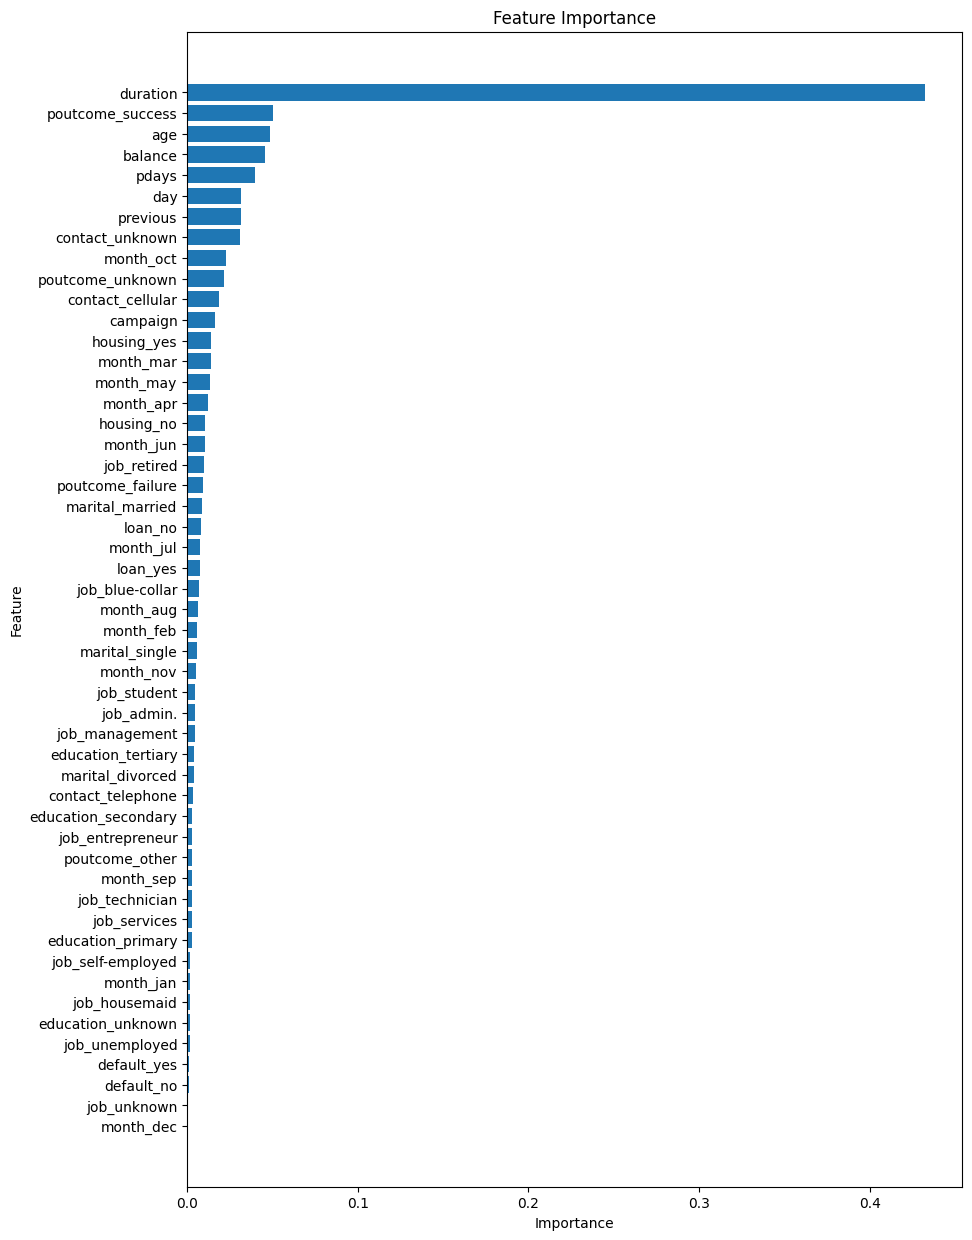

,Feature,Importance
3,duration,0.432658
49,poutcome_success,0.050009
0,age,0.048229
1,balance,0.045354
5,pdays,0.039934
2,day,0.031728
6,previous,0.031216
34,contact_unknown,0.030895
45,month_oct,0.022562
50,poutcome_unknown,0.021563


In [ ]:
DD.fit(X_encoded, y_encoded)
importances = DD.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 15))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

feature_importance_df.head(40)

![важность признаков изначальн](images/barh1.png)

In [149]:
#Немного упростим удалив неиспользуемые признаки
features = feature_importance_df[feature_importance_df['Importance'] < 0.02]['Feature']
low_importance_features = features.tolist()
print(f"Было признаков: {X_encoded.shape[1]}")
X_encoded = X_encoded.drop(columns=low_importance_features) #Удаляем отсееные признаки 
print(f"Стало признаков: {X_encoded.shape[1]}")
print(f"Удалено признаков: {len(low_importance_features)}")


Было признаков: 51
Стало признаков: 10
Удалено признаков: 41


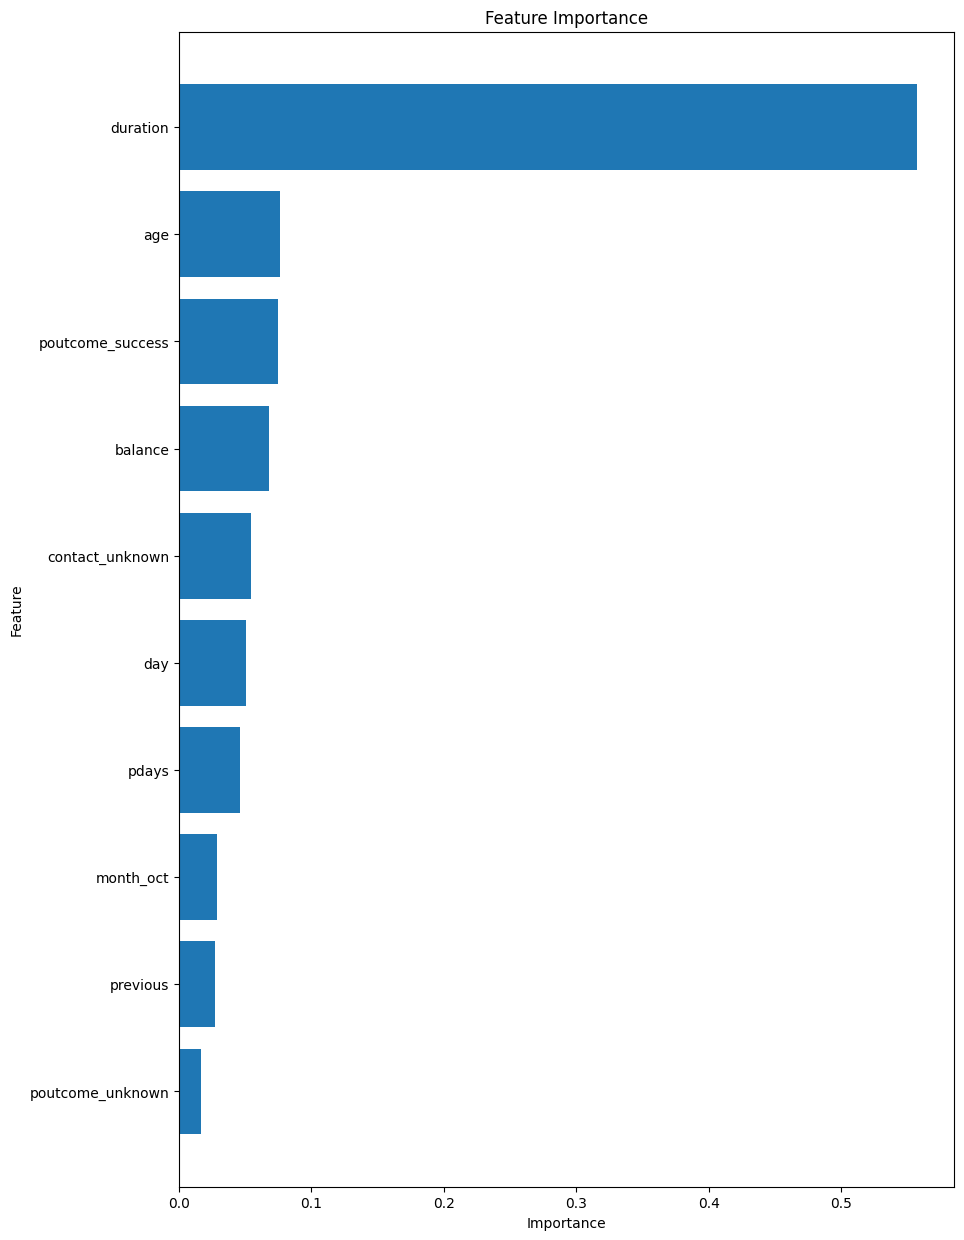

,Feature,Importance
3,duration,0.557379
0,age,0.076588
8,poutcome_success,0.074838
1,balance,0.067917
6,contact_unknown,0.053998
2,day,0.050288
4,pdays,0.045668
7,month_oct,0.029040
5,previous,0.027345
9,poutcome_unknown,0.016938


In [ ]:
DD.fit(X_encoded, y_encoded)
importances = DD.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 15))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

feature_importance_df.head(40)

![важность признаков](images/barh2.png)

In [78]:
#Здесь мы снова делим чтобы получить X_train\text без удалённых признаков
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y, test_size=0.2, random_state=35) 

In [ ]:
DD = RandomForestClassifier(n_estimators=211,max_depth=23,min_samples_split=70,min_samples_leaf=3, criterion='gini', random_state=35,class_weight={0: 1, 1: 5},n_jobs=-1)
DD.fit(X_train2, y_train2) #эти данные уже не те на которых выявлялись параметры для модели
#далее обучаем модель на других данных не на которых обучали. ну точнее на train test от тех данных
#DD.fit(X_encoded, y_encoded)
y_pred2 = DD.predict(X_test2)

# Предсказываем вероятности для тестового набора
y_pred_proba2 = DD.predict_proba(X_test2)[:, 1]

f1 = f1_score(y_test2, y_pred2)
print(f"F1-score: {f1:.8}")
#метрика F1-score: 0.54744526 видим что метрика не изменилась - значит удалённые признаки не влияют на качество модели

F1-score: 0.54744526


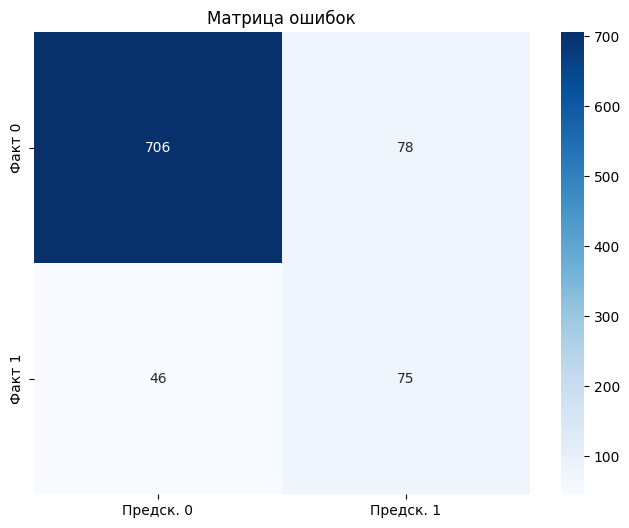

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test2, y_pred2), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Предск. 0', 'Предск. 1'],
            yticklabels=['Факт 0', 'Факт 1'])
plt.title('Матрица ошибок')
plt.savefig('images/matrix.png', dpi=150, bbox_inches='tight')
plt.show()

![Описание графика](images/matrix.png)


In [111]:

dummy = DummyClassifier(strategy="uniform")  # случайное угадывание
dummy.fit(X_train2, y_train2)
y_dummy_proba = dummy.predict_proba(X_test2)[:, 1]  # вероятность для класса 1
dummy_fpr, dummy_tpr, _ = roc_curve(y_test2, y_dummy_proba)
dummy_auc = roc_auc_score(y_test2, y_dummy_proba)

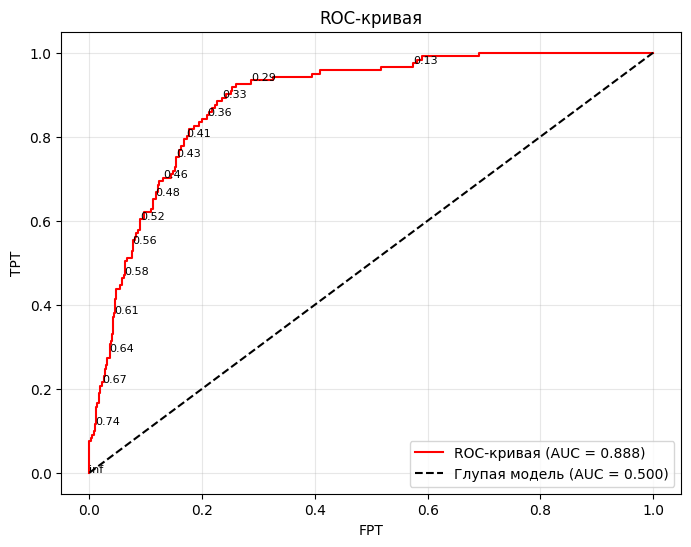

ROC-AUC: 0.888


In [140]:
fpr, tpr, _ = roc_curve(y_test2, y_pred_proba2)
roc_auc = roc_auc_score(y_test2, y_pred_proba2)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC-кривая (AUC = {roc_auc:.3f})')
plt.plot(dummy_fpr, dummy_tpr, 'k--', label=f'Глупая модель (AUC = {dummy_auc:.3f})')
for i in range(0, len(_), 10):  # Каждый 10-й порог
    plt.text(fpr[i], tpr[i], f"{_[i]:.2f}", fontsize=8)

plt.xlabel('FPT')
plt.ylabel('TPT')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.savefig('images/grafROC.png', dpi=150, bbox_inches='tight')
plt.show()
#Здесь наглядно видно, на сколько наша модель лучше случайного значения))
print(f"ROC-AUC: {roc_auc:.3f}")

![ROC-кривая](images/grafROC.png) 

PR-AUC: 0.533
PR-AUC на случайной модели: 0.134


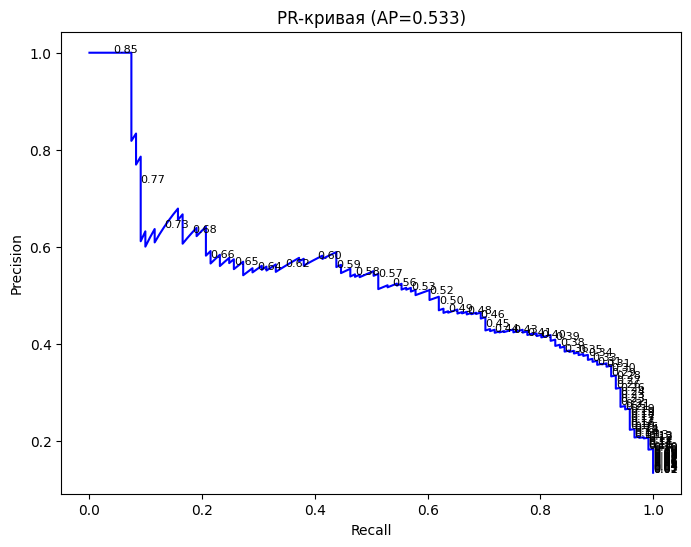

In [141]:
precision, recall, _ = precision_recall_curve(y_test2, y_pred_proba2)
plt.figure(figsize=(8, 6)) 
plt.plot(recall, precision, color='blue')
pr_auc = auc(recall, precision)
plt.title(f'PR-кривая (AP={pr_auc:.3f})')

for i in range(0, len(_), 10):  # Каждый 10-й порог
    plt.text(recall[i], precision[i], f"{_[i]:.2f}", fontsize=8)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.savefig('images/grafPR.png', dpi=150, bbox_inches='tight')

print(f"PR-AUC: {pr_auc:.3}")
pr_auc_dummy = average_precision_score(y_test2, y_dummy_proba)
print(f"PR-AUC на случайной модели: {pr_auc_dummy:.3f}")
#Видим что случайная модель даёт 0.134, что значительно меньше. Значит не всё так плохо

![График](images/grafPR.png)

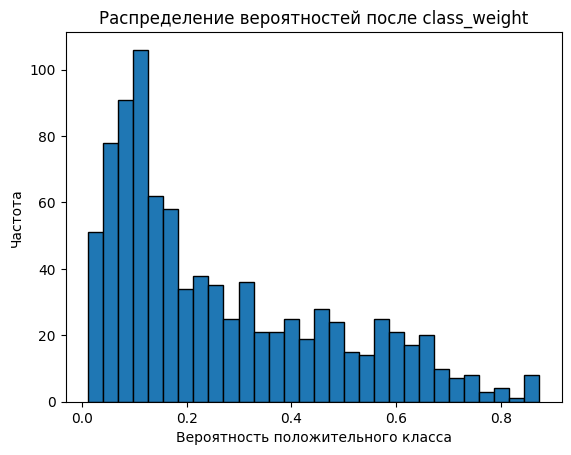

In [ ]:
#Здесь мы видим распределение каких сколько вероятностей,чтобы увидеть какой порог повлияет на большее количество
y_scores = DD.predict_proba(X_test2)[:, 1]  # Вероятности для положительного класса

plt.hist(y_scores, bins=30, edgecolor='black')
plt.xlabel("Вероятность положительного класса")
plt.ylabel("Частота")
plt.title("Распределение вероятностей после class_weight")
plt.savefig('images/hist.png', dpi=150, bbox_inches='tight')
plt.show()


![гистограмма ](images/hist.png)

In [87]:
for i in range(3,7):
    e=i/10
    optimal_threshold = e
    print(e)
    y_pred_custom = (y_scores >= optimal_threshold).astype(int)
    f1 = f1_score(y_test2, y_pred_custom)
    precision = precision_score(y_test2, y_pred_custom, pos_label=1)
    recall = recall_score(y_test2, y_pred_custom, pos_label=1)

    print(f"Precision: {precision}")
    print(f"Recall : {recall}")
    print("F1-score:", f1)



0.3
Precision: 0.34355828220858897
Recall : 0.9256198347107438
F1-score: 0.5011185682326622
0.4
Precision: 0.41422594142259417
Recall : 0.8181818181818182
F1-score: 0.55
0.5
Precision: 0.49019607843137253
Recall : 0.6198347107438017
F1-score: 0.5474452554744526
0.6
Precision: 0.5795454545454546
Recall : 0.4214876033057851
F1-score: 0.4880382775119617


In [ ]:
#Мы видим что только 4 и 5 пороги дают более менее хорошие результаты. Здесь надо выбрать в зависимости от задачи. Естественный порог 0.5 мне видится оптимальным,но
#возможно, что и 0.4 может оказаться валиднее если задача найти как можно больше возможных подписчиков.. (В случае дешевой рекламной рассылки).
#Я не буду менять порог - оставлю 0.5

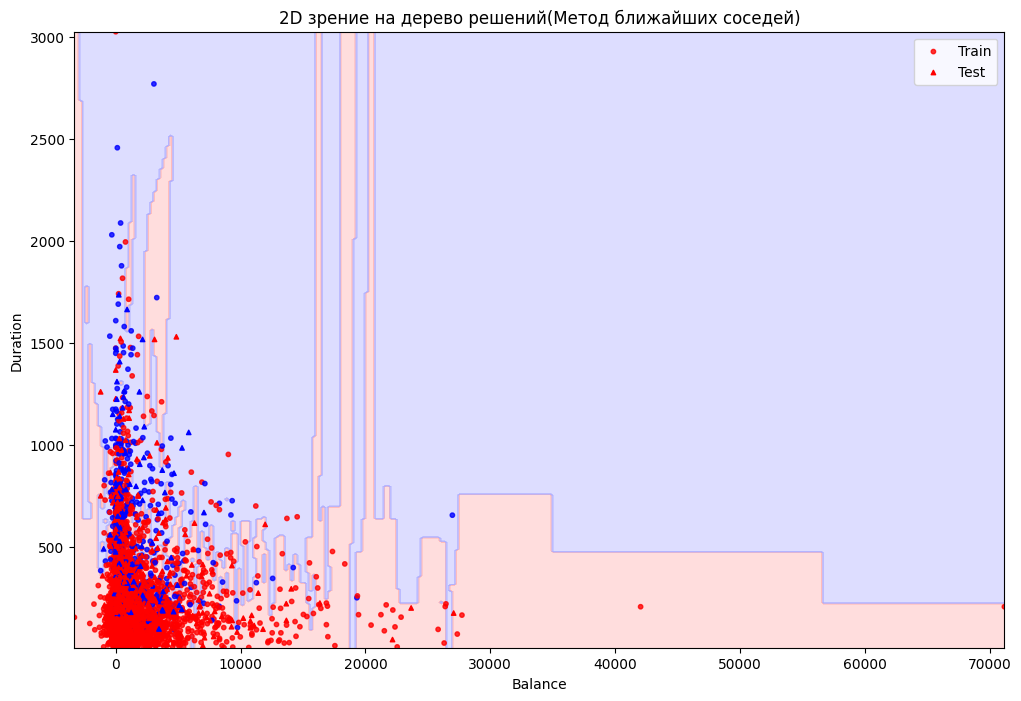

In [ ]:

n_estimators=100

#Далее здесь вариант 2д отображения областей дерева, сетка которого заполняется по методу ближайших соседей
X_all = pd.concat([X_train2, X_test2])
x_min, x_max = X_all['balance'].min(), X_all['balance'].max()
y_min, y_max = X_all['duration'].min(), X_all['duration'].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

grid_df = pd.DataFrame(grid, columns=['balance', 'duration'])

# Поиск ближайших соседей 
nb = NearestNeighbors(n_neighbors=1).fit(X_train2[['balance', 'duration']])
distances, indices = nb.kneighbors(grid_df[['balance', 'duration']])

for col in X_train2.columns:
    if col not in ['balance', 'duration']:
        grid_df[col] = X_train2.iloc[indices.flatten()][col].values

grid_df = grid_df[X_train2.columns]

Z = DD.predict(grid_df)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))

plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))

plt.scatter(X_train2['balance'], X_train2['duration'], 
            c=y_train2, cmap=ListedColormap(['red', 'blue']),
            s=10, alpha=0.8, label='Train')

plt.scatter(X_test2['balance'], X_test2['duration'], 
            c=y_test2, cmap=ListedColormap(['red', 'blue']),
            s=10, alpha=1,marker='^', label='Test')

plt.xlabel("Balance")
plt.ylabel("Duration")
plt.title("2D зрение на дерево решений(Метод ближайших соседей)")
plt.legend()
plt.show()

![2d](images/2d1.png)

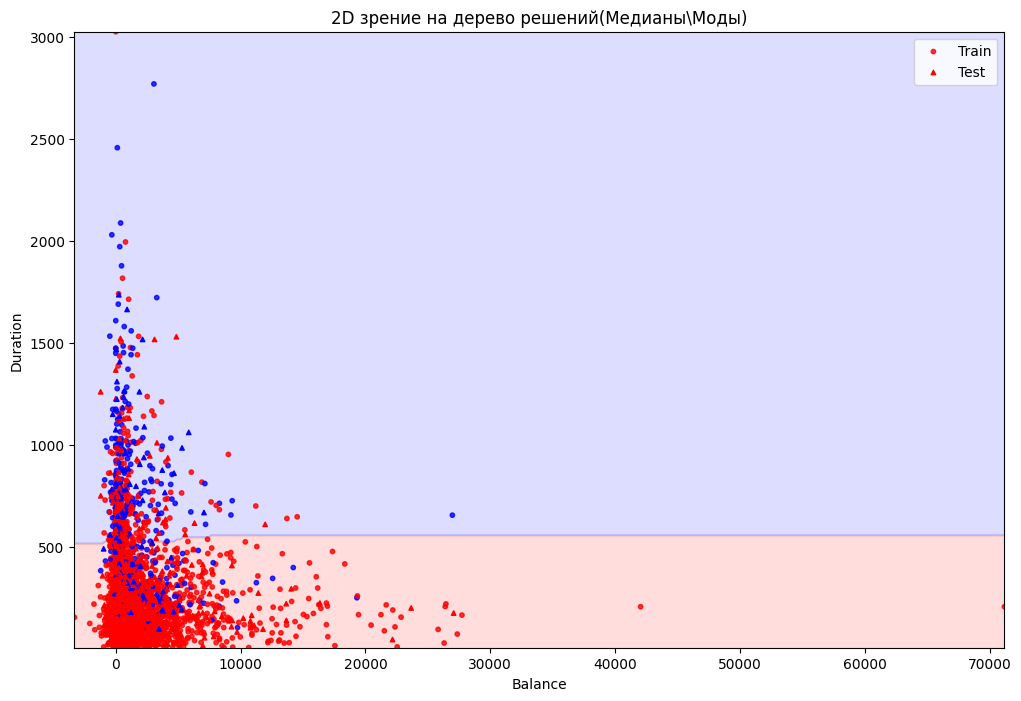

In [ ]:

X_all = pd.concat([X_train2, X_test2])
x_min, x_max = X_all['balance'].min(), X_all['balance'].max()
y_min, y_max = X_all['duration'].min(), X_all['duration'].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid_data = []

fixed_values = {}
for col in X_train2.columns:
    if col not in ['balance', 'duration']:
        if X_train2[col].dtype in ['int64', 'float64']:
            fixed_values[col] = X_train2[col].median()
        else:
            fixed_values[col] = X_train2[col].mode()[0]


for x, y in zip(xx.ravel(), yy.ravel()):
    row = fixed_values.copy()  
    row['balance'] = x         
    row['duration'] = y
    grid_data.append(row)
    
grid_df = pd.DataFrame(grid_data)[X_train2.columns] 

Z = DD.predict(grid_df)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_train2['balance'], X_train2['duration'], 
            c=y_train2, cmap=ListedColormap(['red', 'blue']),
            s=10, alpha=0.8, label='Train')
plt.scatter(X_test2['balance'], X_test2['duration'], 
            c=y_test2, cmap=ListedColormap(['red', 'blue']),
            s=10, alpha=1, marker='^', label='Test')
plt.xlabel("Balance")
plt.ylabel("Duration")
plt.title("2D зрение на дерево решений(Медианы\Моды)")
plt.legend()
plt.show()

![2d2](images/2d2.png)